In [2]:
# auto reload for python packages
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
from SubGraphMatcher import SubGraphMatcher 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def draw_graph(G):
    labels = nx.get_node_attributes(G, 'feat') 
    options = {
        'node_color': 'yellow',
        'node_size': 400,
        'width': 3,
        'labels': labels,
        'with_labels': True
    }
    nx.draw(G, **options)
    plt.show()

G_t = nx.path_graph(10)
G_q = nx.path_graph(2)
# draw_graph(G_t)
# draw_graph(G_q)

In [4]:
# Create a list of queris
queries = []
for i in range(10):
    queries.append(nx.path_graph(i))

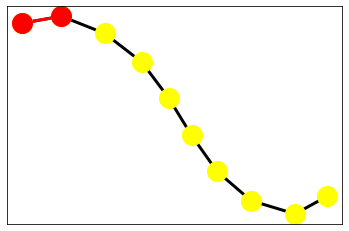

Matched! (0, 1)
True


In [5]:
SGM = SubGraphMatcherNaive(G_t)
print(SGM.check_match_subgraph(G_q))
# SGM.LDF(G_q, G_t)

In [4]:
# Test the node feature part
G1 = nx.Graph()
G1.add_nodes_from([
    (0, {'feat': 'A'}),
    (1, {'feat': 'B'}),
    (2, {'feat': 'C'}),
    (3, {'feat': 'D'}),
])
G1.add_edges_from([
    (0, 1),
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3)])
# draw_graph(G1)

In [12]:
G2 = nx.Graph()
G2.add_nodes_from([
    (0, {'feat': 'A'}),
    (1, {'feat': 'C'}),
    (2, {'feat': 'B'}),
    (3, {'feat': 'C'}),
    (4, {'feat': 'B'}),
    (5, {'feat': 'C'}),
    (6, {'feat': 'B'}),
    (7, {'feat': 'C'}),
    (8, {'feat': 'D'}),
    (9, {'feat': 'D'}),
    (10, {'feat': 'D'}),
    (11, {'feat': 'D'}),
    (12, {'feat': 'D'}),
    (13, {'feat': 'C'}),
    (14, {'feat': 'D'}),
])
G2.add_edges_from([
    (0, 1),
    (0, 2),
    (0, 3),
    (0, 4),
    (0, 5),
    (0, 6),
    (0, 7),
    (1, 2),
    (1, 8),
    (2, 9),
    (2, 10),
    (3, 4),
    (3, 10),
    (4, 5),
    (4, 10),
    (4, 11),
    (4, 12),
    (5, 12),
    (6, 12),
    (6, 13),
    (7, 14),
    (9, 10),
])
# draw_graph(G2)

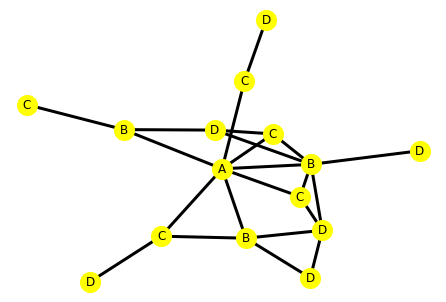

In [13]:
draw_graph(G2)

In [14]:
# Validate the subgraph matching with node features
SGM = SubGraphMatcher(G2)
SGM.check_match_subgraph(G1)

Running LDF...
--- 0.00015878677368164062 seconds ---, LDF Done
After the filtering, 66.66666666666666% of the nodes left
LDF output (0, 0) 10
running NLF...
--- 0.0007619857788085938 seconds ---, NLF Done
After the filtering, 60.0% of the nodes left
enumerating...
enumeration done, takes 0.0002799034118652344
--- 0.002803802490234375 seconds ---, Job done
Totally find 2 matches.
 
 


[0.6, [{0: 0, 1: 4, 2: 3, 3: 10}, {0: 0, 1: 4, 2: 5, 3: 12}]]

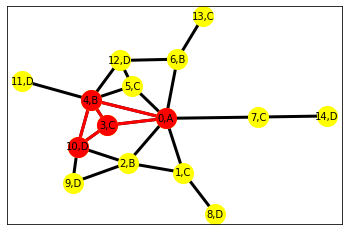

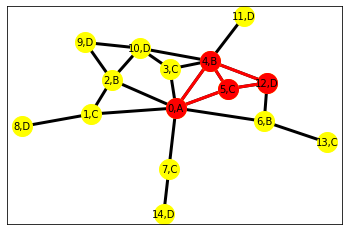

In [384]:
SGM.draw_multi_results()

In [354]:
SGM.backward_neighbors(3, [0,1,2,3], G1)

enter backward_neighbors computation
u is 3
order is [0, 1, 2, 3]
ns is []


[]